In [39]:
import torch
from matplotlib import pyplot as plt
import math
import numpy as np

In [40]:
cap_70hu = np.load("../../data/stats/toydata/cap_data_mlp_70hu_5l.npy")
vol_70hu = np.load("../../data/stats/toydata/vol_data_mlp_70hu_5l.npy")
rad_70hu = np.load("../../data/stats/toydata/radius_data_mlp_70hu_5l.npy")

cap_100hu = np.load("../../data/stats/toydata/cap_data_mlp_100hu_5l.npy")
vol_100hu = np.load("../../data/stats/toydata/vol_data_mlp_100hu_5l.npy")
rad_100hu = np.load("../../data/stats/toydata/radius_data_mlp_100hu_5l.npy")

cap_20hu = np.load("../../data/stats/toydata/cap_data_mlp_20hu_5l.npy")
vol_20hu = np.load("../../data/stats/toydata/vol_data_mlp_20hu_5l.npy")
rad_20hu = np.load("../../data/stats/toydata/radius_data_mlp_20hu_5l.npy")

cap_40hu = np.load("../../data/stats/toydata/cap_data_mlp_40hu_5l.npy")
vol_40hu = np.load("../../data/stats/toydata/vol_data_mlp_40hu_5l.npy")
rad_40hu = np.load("../../data/stats/toydata/radius_data_mlp_40hu_5l.npy")

coords = np.load("../../data/stats/toydata/xs.npy")
labels = np.load("../../data/stats/toydata/ys.npy")

In [41]:
tau_70hu = cap_70hu / vol_70hu
tau_20hu = cap_20hu / vol_20hu
tau_40hu = cap_40hu / vol_40hu
tau_100hu = cap_100hu / vol_100hu

In [42]:
print(tau_70hu.mean(), tau_20hu.mean(), tau_40hu.mean(), tau_100hu.mean())
print(tau_70hu.std(), tau_20hu.std(), tau_40hu.std(), tau_100hu.std())
print(tau_70hu.shape)

4.203193 3.8070161 3.8872979 4.1306443
0.4717899 0.71958464 0.6541679 0.5682437
(1000,)


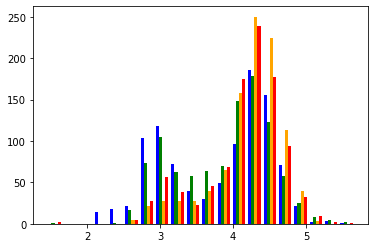

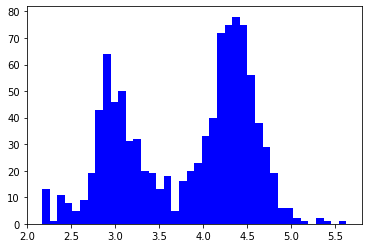

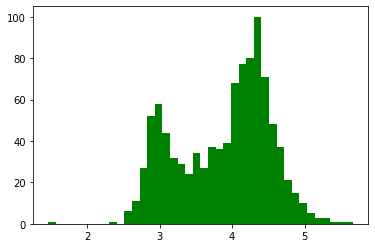

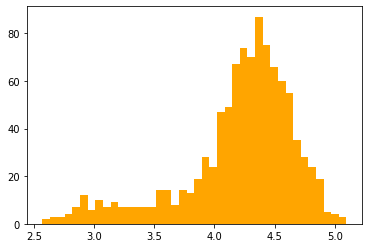

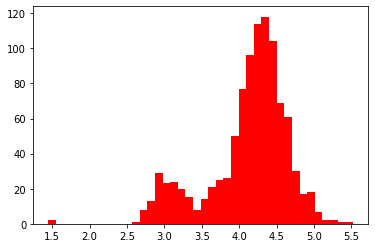

In [8]:
plt.hist([tau_20hu, tau_40hu[tau_40hu < 6.], tau_70hu, tau_100hu[tau_100hu < 6.]], color=["blue", "green", "orange", "red"], bins=20)
plt.show()
plt.hist(tau_20hu, color="blue", bins=40)
plt.show()
plt.hist(tau_40hu[tau_40hu < 6.], color="green", bins=40)
plt.show()
plt.hist(tau_70hu, color="orange", bins=40)
plt.show()
plt.hist(tau_100hu[tau_100hu < 6.], color="red", bins=40)
plt.show()

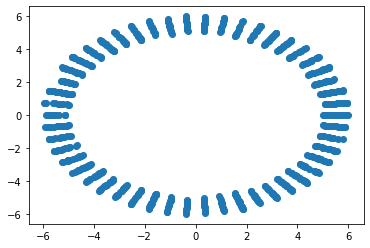

In [32]:
xs = coords[:, 0]
ys = coords[:, 1]
plt.scatter(xs, ys)
plt.show()

In [103]:
taun = {}
for hu, tau in {20: tau_20hu, 40: tau_40hu, 70: tau_70hu, 100: tau_100hu}.items():
    tau[tau > 6] = 3.
    taun[hu] = tau / tau.max()

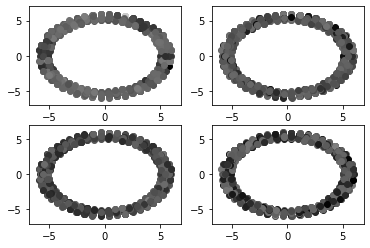

In [85]:
fig = plt.figure()
ax1 = fig.add_subplot(224)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(222)
ax4 = fig.add_subplot(221)

for i in range(len(xs)):
    ax1.scatter(xs[i], ys[i], color=[tau20n[i], tau20n[i], tau20n[i]])

for i in range(len(xs)):
    ax2.scatter(xs[i], ys[i], color=[tau40n[i], tau40n[i], tau40n[i]])

for i in range(len(xs)):
    ax3.scatter(xs[i], ys[i], color=[tau70n[i], tau70n[i], tau70n[i]])

for i in range(len(xs)):
    ax4.scatter(xs[i], ys[i], color=[tau100n[i], tau100n[i], tau100n[i]])
    
plt.show()


In [56]:
print(tau_100hu.max(), tau_100hu.min())

7.215007 1.450116


Model loaded


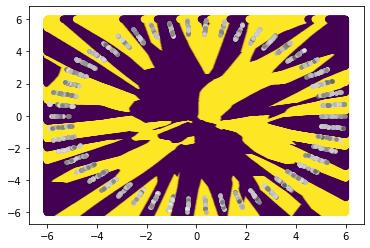

Model loaded


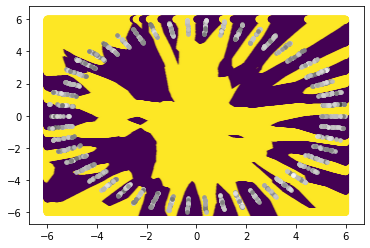

Model loaded


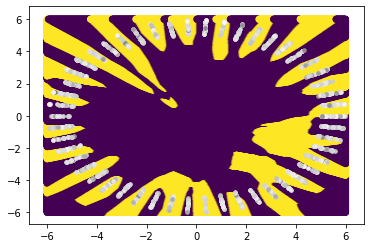

Model loaded


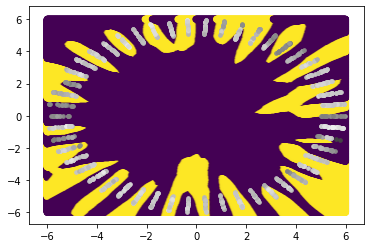

In [107]:
import torch
import sys
sys.path.append("../../")
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

from datasets import Star
from models.toydata.models import MLPModel
import time
import numpy as np

from matplotlib import pyplot as plt

def plot_db_tau(model_type=100):
    model_load_path = '../../data/saved_models/toydata/mlp_'+ str(model_type) +'hu_5l.pt'
    batch_size = 1250
    torch.manual_seed(1)
    device = torch.device("cuda")
    kwargs = {'num_workers': 1, 'pin_memory': True}

    star_ds = Star()
    
    train_loader = torch.utils.data.DataLoader(star_ds, batch_size, shuffle=True, **kwargs)

    model = MLPModel(hidden_nodes=model_type).to(device)

    checkpoint = torch.load(model_load_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    print("Model loaded")
    model.eval()

    int_length = 1.
    start = -6
    end = 6
    num_xs = 1000
    num_ys = 1000
    xs = torch.linspace(start, end, num_xs)
    ys = torch.linspace(start, end, num_ys)

    for x in xs:
        inp = ys.unsqueeze(1).float().to(device)
        inp = torch.cat([inp, x.data*torch.ones_like(inp)], dim=1)
        out = model(inp)
        pred = out.argmax(dim=1)
        plt.scatter(inp[:, 0].cpu(), inp[:, 1].cpu(), c=pred.cpu())
    
    xs = coords[:, 0]
    ys = coords[:, 1]
    for i in range(len(xs)):
        plt.scatter(xs[i], ys[i], s=13, color=[taun[model_type][i], taun[model_type][i], taun[model_type][i]])
    
    plt.show()

for model in [20, 40, 70, 100]:
    plot_db_tau(model)

In [30]:
import sys
sys.path.append("../..")
from utils.utils import planar_cap

samplings = 10
vals = []
for i in range(samplings):
    val = planar_cap(target_vol=0.01, dim=784, num_samples=100000)
    vals += [val]
    print(val)

(tensor(0.0216), tensor(2.0557))
(tensor(0.0216), tensor(2.0421))
(tensor(0.0216), tensor(2.0024))
(tensor(0.0216), tensor(2.0117))
(tensor(0.0216), tensor(2.0363))
(tensor(0.0216), tensor(2.2158))
(tensor(0.0187), tensor(1.9535))
(tensor(0.0187), tensor(1.9699))
(tensor(0.0216), tensor(2.0616))
(tensor(0.0216), tensor(2.0616))


In [31]:
x = [i[1] for i in vals]

In [32]:
x = np.array(x)

In [33]:
x.mean()

2.0410562

In [43]:
cap_100hu

array([0.421     , 0.49500003, 0.51600003, 0.48600003, 0.51      ,
       0.472     , 0.49300003, 0.523     , 0.321     , 0.522     ,
       0.367     , 0.46100003, 0.499     , 0.5       , 0.472     ,
       0.31700003, 0.48300004, 0.45800003, 0.559     , 0.46800002,
       0.49700004, 0.47900003, 0.522     , 0.46600002, 0.517     ,
       0.46600002, 0.41700003, 0.472     , 0.46400005, 0.486     ,
       0.48000002, 0.46900004, 0.49800003, 0.46000004, 0.46000004,
       0.49400002, 0.44500002, 0.45600003, 0.47800002, 0.41200003,
       0.48000002, 0.347     , 0.46800002, 0.485     , 0.51600003,
       0.49700004, 1.        , 0.32600003, 0.46600002, 0.462     ,
       0.46900004, 0.48000002, 0.53900003, 0.503     , 0.49100003,
       0.472     , 0.39100003, 0.46500003, 0.48200002, 0.50200003,
       0.486     , 0.52500004, 0.47900003, 0.329     , 0.48800004,
       0.472     , 0.49800003, 0.48400003, 0.46400005, 0.46800002,
       0.577     , 0.45900002, 0.51000005, 0.49200004, 0.47500